In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import ast
from scipy import sparse

C:\Users\remij\Miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\remij\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\remij\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from IPython.display import SVG
from sknetwork.embedding.force_atlas import ForceAtlas
from sknetwork.visualization import svg_graph

In [3]:
data = pd.read_csv('test_df2.csv')

In [4]:
data.collabs

0           ['judesmithmusic', 'fender', 'dangelicony']
1     ['glenwoodcrowe', 'mandagracemusic', 'ronartis...
2     ['jonah.nilsson', 'justinbieber', 'jacobcollier']
3     ['simplebluesboy', 'l.a.cendon', 'theguitarpig...
4                                  ['shannonlcallihan']
5     ['adamusic_', 'fionakida', 'aneesastrings', 't...
6          ['misterblair', 'johnmarknelson', 'fibulaa']
7     ['jacktjames_', 'johnmarknelson', 'liannefrank...
8     ['johnmarknelson', 'thunderstormartis', 'hydro...
9                             ['tiktok', 'charlieputh']
10    ['dangelicony', 'wildwomanpussypower', 'joshpl...
11    ['johnmarknelson', 'dangelicony', 'romabulakho...
12                                      ['dangelicony']
13                  ['dangelicony', 'nicole_cerminara']
14                                           ['fender']
15                                                   []
16                                                   []
17                 ['ellenonceagain', 'simpleblu

In [5]:
data.reset_index(level=0, inplace=True)

In [6]:
def convert_to_adjacency(data):
    L = []
    for i in range(len(data)):
        l = []
        for cand in (ast.literal_eval(data.collabs[i])):
            if cand in list(data.user_name):
                l.append(int(data[data['user_name'] == cand]['index']))
        L.append(l)
    return L

In [7]:
def convert_to_matrix(graph):
    matrix = []
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j] = 1
    return matrix

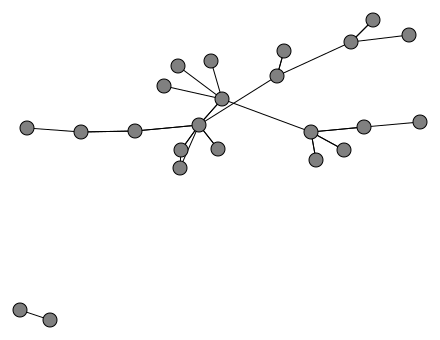

In [8]:
adjacency = convert_to_matrix(convert_to_adjacency(data))
adjacency = sparse.csr_matrix(adjacency)
image = svg_graph(adjacency)
SVG(image)

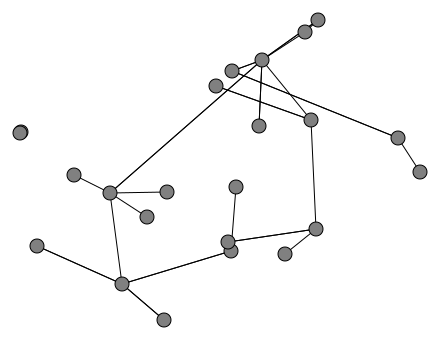

In [9]:
forceatlas2 = ForceAtlas()
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding)
SVG(image)